[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



A. What kind of fruit
B. How tall someone is
C. The number of full oranges that can fit into a basket.
D. My stock prices

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

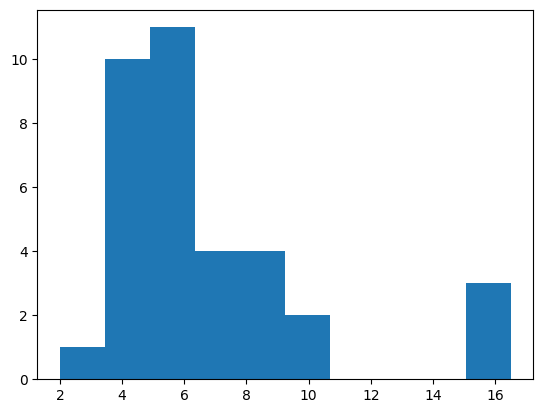

In [2]:
plt.hist(carbon_west["CO2"])
plt.show()

Part b. Find the mean, median, and standard deviation.

In [3]:
carbon_west["CO2"].describe()

count    35.000000
mean      6.717143
std       3.356949
min       2.000000
25%       4.450000
50%       5.900000
75%       8.000000
max      16.500000
Name: CO2, dtype: float64

**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [4]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [5]:
murders.head()

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6


In [6]:
murders[murders["state"] != "DC"]["murder"].mean(), murders[murders["state"] != "DC"]["murder"].std(), murders[murders["state"] != "DC"]["murder"].median()

(4.874, 2.586291174793806, 4.85)

Part b. Find the five-number  summary without D.C.

In [7]:
murders[murders["state"] != "DC"]["murder"].describe().iloc[3:]

min     1.000
25%     2.625
50%     4.850
75%     6.175
max    12.400
Name: murder, dtype: float64

Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [8]:
murders["murder"].mean(), murders["murder"].std(), murders["murder"].median()

(5.252941176470588, 3.7253914125190373, 5.0)

In [9]:
murders["murder"].describe().iloc[3:]

min     1.00
25%     2.65
50%     5.00
75%     6.45
max    24.20
Name: murder, dtype: float64

In [10]:
"""
The Standard deviation is greatly affected.
Even more, the range is the most effected, as the max is way higher
"""

'\nThe Standard deviation is greatly affected.\nEven more, the range is the most effected, as the max is way higher\n'

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [11]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

In [12]:
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


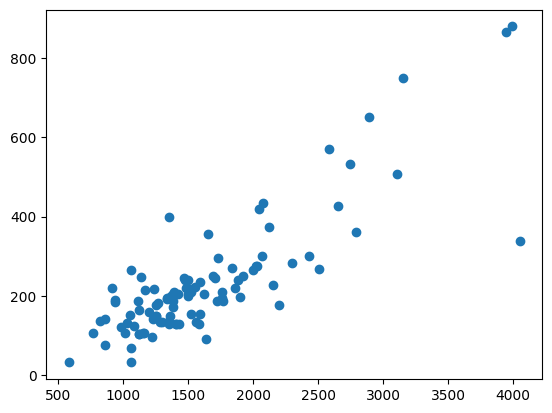

In [13]:
plt.scatter(houses["size"], houses["price"])
plt.show()

Part b. Find the correlation between the two variables.

In [14]:
import numpy as np
np.corrcoef(houses["size"], houses["price"])

array([[1.        , 0.83378479],
       [0.83378479, 1.        ]])

Part c. Find and plot the regression line on top of the scatterplot.

In [15]:
# Calculate the means of x and y
x_mean = houses["size"].mean()
y_mean = houses["price"].mean()

# Calculate the slope (m)
xy = houses["size"] * houses["price"]
xx = houses["size"] * houses["size"]
slope = (xy.mean() - x_mean * y_mean) / (xx.mean() - x_mean * x_mean)

# Calculate the intercept (b)
intercept = y_mean - slope * x_mean

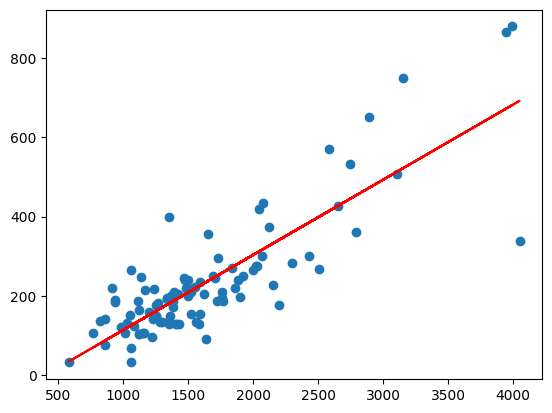

In [16]:
plt.scatter(houses["size"], houses["price"])
plt.plot(houses["size"], slope * houses["size"] + intercept, color='red', label='Regression line')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

In [17]:
houses["new"].unique()

array([0, 1])

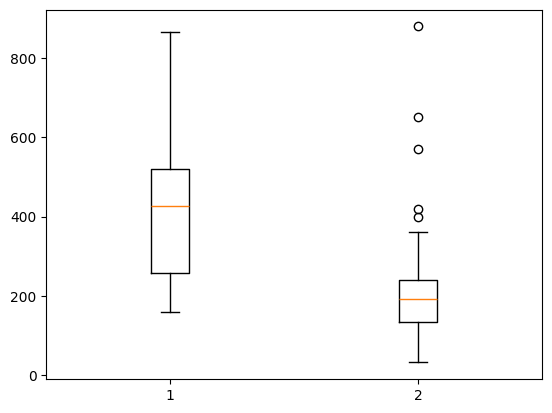

In [18]:
plt.boxplot([houses[houses["new"] == 1]["price"], houses[houses["new"] == 0]["price"]])
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The relationship between price is correlated, with a strong positive influence. As houses get bigger, prices get larger as seen by the graph

----

Similarly, new houses are more expensive than older houses, centered around 420, whereas old houses mean price is about 200. New houses have a greater range of prices (excluding outliers), where the majority of old houses fall beneath 380.



**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [19]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep = '\\s+')

In [20]:
happy.sample(4) #The gender and marital columns seem wrong.

,subject,happiness,marital,gender
1083,1084,1,1,female
107,108,1,1,male
1603,1604,2,2,female
1735,1736,2,2,female


In [21]:
contingency_table = pd.crosstab(happy['happiness'], happy['marital'])
contingency_table #I beleive the data we are given here may be messed up.

marital,1,2,3
happiness,,,
1,432,92,124
2,504,282,409
3,61,103,135
